# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [ ]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

In [ ]:
import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

In [ ]:
plt.plot(lut.kwadratowa)
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [ ]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

In [ ]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

In [ ]:
I = cv2.imread("lena.bmp")
plt.imshow(I)
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

In [ ]:
I2 = cv2.LUT(I, lut.kwadratowa)

In [ ]:
plt.imshow(I2)

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [ ]:
def LUT(image, table, table_name=""):
    new_image = cv2.LUT(image, table)
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    fig.suptitle(table_name.upper())
    
    ax[0].plot(table, color="maroon", linewidth=3)
    ax[0].set_aspect('equal')
    ax[0].title.set_text("look up table")
    
    ax[1].imshow(image)
    ax[1].title.set_text("original image")
    
    ax[2].imshow(new_image)
    ax[2].title.set_text("modified image")
    
    plt.show()
    print("---")

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

In [ ]:
LUT(I, lut.kwadratowa, "kwadratowa")
LUT(I, lut.log, "logarytmiczna")
LUT(I, lut.pila, "piła")
LUT(I, lut.odwlog, "odwrotna logarytmiczna")
LUT(I, lut.wykladnicza, "wykladnicza")
LUT(I, lut.odwrotna, "odwrotna")
LUT(I, lut.pierwiastkowa, "pierwiastkowa")

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

In [ ]:
img_lena = cv2.imread("lena.bmp")
plt.imshow(img_lena)
plt.show()


img_jet = cv2.imread("jet.bmp")
plt.imshow(img_jet)
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

In [ ]:
plt.imshow(cv2.add(img_lena, img_jet))
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

In [ ]:
added_image = cv2.add(img_lena.astype('uint16'), img_jet.astype('uint16'))//2
added_image = added_image.astype('uint8')

plt.imshow(added_image)
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

In [ ]:
print("lena: 0.5, jet: 0.5")
plt.imshow(cv2.addWeighted(img_lena, 0.5, img_jet, 0.5,  0))
plt.show()

print("lena: 0.8, jet: 0.2")
plt.imshow(cv2.addWeighted(img_lena, 0.8, img_jet, 0.2,  0))
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

In [ ]:
plt.imshow(cv2.subtract(img_lena, img_jet))
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

In [ ]:
sub_image = cv2.subtract(img_lena.astype('int16'), img_jet.astype('int16'))
sub_image = np.abs(sub_image)

plt.imshow(sub_image)
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

In [ ]:
mult_image = cv2.multiply(img_lena.astype('double')/255, img_jet.astype('double')/255)*255
mult_image = mult_image.astype('uint8')

plt.imshow(mult_image)
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [ ]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

In [ ]:
mask = cv2.imread('kolo.bmp').astype('bool').astype('uint8')

plt.imshow(cv2.multiply(mask, img_lena))
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

In [ ]:
plt.imshow(cv2.bitwise_not(img_lena))
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [ ]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

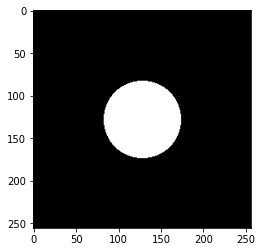

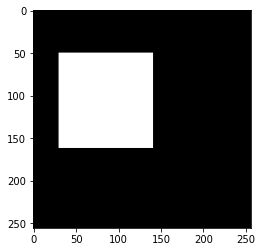

In [3]:
kolo = plt.imread('kolo.bmp')
kwadrat = plt.imread('kwadrat.bmp')

plt.imshow(kolo)
plt.gray()
plt.show()

plt.imshow(kwadrat)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

AND


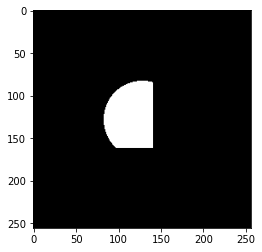

OR


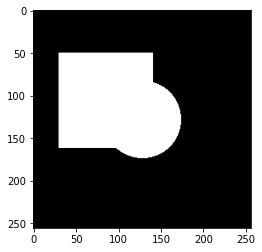

XOR


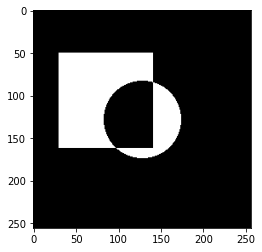

NOT


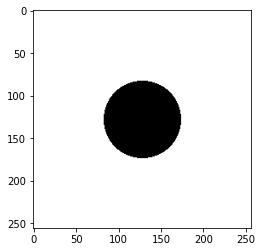

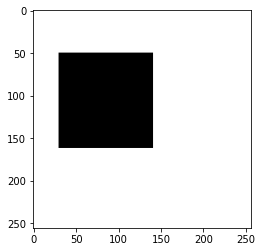

In [4]:
print('AND')
plt.imshow(kolo & kwadrat)
plt.show()

print('OR')
plt.imshow(kolo | kwadrat)
plt.show()

print('XOR')
plt.imshow(kolo ^ kwadrat)
plt.show()

print('NOT')
plt.imshow(~kolo)
plt.show()

plt.imshow(~kwadrat)
plt.show()